# Лабораторна робота 2

## Тема: OpenCV. Геометричні перетворення зображення.

## Мета: знайомство з методами геометричних перетворень бібліотеки OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python.

*Зробив: Савченко Андрій*

*Виконав: 28.10.2024*

## Завдання для самостіної роботи

### 1. Завантажити Anaconda та активувати віртуальне середовище з ім’ям StudentLastName_OpenCV, створене у лабораторній роботі №1.

### 2. Створити Notebook-документ <lab_2_StudentLastName> за допомогою Jupyter Notebook. (Див. тут, тут і тут).

### 3. Імпортувати RGB-зображення Image з диску. Оцінити його розмір у пікселях NxM та об’єм пам’яті, який він займає на диску.

In [1]:
from PIL import Image
import os

# Завантаження RGB-зображення
image_path = 'Treatment.jpg'
image = Image.open(image_path)

# Оцінка розміру зображення
width, height = image.size
print(f"Розмір зображення: {width} x {height} пікселів")

# Оцінка об’єму пам'яті на диску
file_size = os.path.getsize(image_path) / 1024  # в КБ
print(f"Об'єм пам'яті: {file_size:.2f} КБ")

Розмір зображення: 964 x 1280 пікселів
Об'єм пам'яті: 104.31 КБ


<img src="Treatment.jpg">

### 4. Імпортувати RGB-зображення Image у напівтоновому форматі. Оцінити його розмір у пікселях та об’єм пам’яті, який він займає на диску. Порівняти результати з попередніми результатами. Пояснити результати.

In [2]:
# Перетворення зображення у напівтоновий формат (градації сірого)
halftone_image = image.convert('L')
halftone_image_path = 'halftone_image.jpg'
halftone_image.save(halftone_image_path)

# Оцінка розміру зображення у градаціях сірого
halftone_width, halftone_height = halftone_image.size
print(f"Розмір напівтонового зображення: {halftone_width} x {halftone_height} пікселів")

# Оцінка об’єму пам'яті напівтонового зображення
halftone_file_size = os.path.getsize(halftone_image_path) / 1024  # в КБ
print(f"Об'єм пам'яті напівтонового зображення: {halftone_file_size:.2f} КБ")

# Порівняння результатів
print(f"Напівтонове зображення займає менше місця на диску на {(file_size - halftone_file_size):.2f} КБ.")

Розмір напівтонового зображення: 964 x 1280 пікселів
Об'єм пам'яті напівтонового зображення: 85.79 КБ
Напівтонове зображення займає менше місця на диску на 18.52 КБ.


<img src="halftone_image.jpg">

Напівтонові зображення мають меншу глибину кольорів (8-бітні замість 24-бітних для RGB), тому вони займають менше місця на диску.

### 5. Зменшити початкове RGB-зображення Image у n разів, візуалізувати його, перевіривши результат масштабування, та експортувати його на диск. Чи змінився об’єм пам’яті, який він займає на диску? Обгрунтувати отриманий результат.

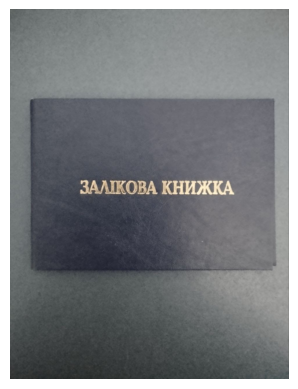

Об'єм пам'яті зменшеного зображення: 25.47 КБ
Об'єм пам'яті зменшився на 78.84 КБ.


In [4]:
import matplotlib.pyplot as plt

# Коефіцієнт масштабування
n = 2

# Зменшення зображення
resized_image = image.resize((width // n, height // n))

# Візуалізація
plt.imshow(resized_image)
plt.axis('off')
plt.show()

# Експорт зменшеного зображення
resized_image_path = 'resized_image.jpg'
resized_image.save(resized_image_path)

# Оцінка об’єму пам'яті зменшеного зображення
resized_file_size = os.path.getsize(resized_image_path) / 1024  # в КБ
print(f"Об'єм пам'яті зменшеного зображення: {resized_file_size:.2f} КБ")

# Чи змінився об’єм пам’яті?
print(f"Об'єм пам'яті зменшився на {(file_size - resized_file_size):.2f} КБ.")

Після зменшення зображення об'єм пам'яті зменшується, оскільки кількість пікселів у новому зображенні пропорційно менша.

### 6. Написати функцію, яка буде виконувати пропорційне зменшення початкового зображення розміром NxM пікселей відповідно до вимоги, щоби зменешене зображення мало ширину K пікселей.

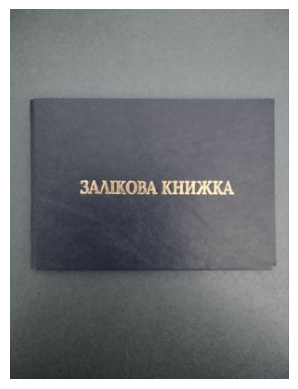

Об'єм пам'яті зображення з шириною 300 пікселів: 10.75 КБ


In [5]:
def resize_to_width(image, K):
    width, height = image.size
    new_height = int((K / width) * height)
    resized_image = image.resize((K, new_height))
    return resized_image

# Приклад використання функції
K = 300  # Нова ширина зображення
resized_image_by_width = resize_to_width(image, K)

# Візуалізація результату
plt.imshow(resized_image_by_width)
plt.axis('off')
plt.show()

# Експорт зображення з новою шириною
resized_by_width_image_path = 'resized_by_width_image.jpg'
resized_image_by_width.save(resized_by_width_image_path)

# Оцінка об’єму пам'яті
resized_by_width_file_size = os.path.getsize(resized_by_width_image_path) / 1024  # в КБ
print(f"Об'єм пам'яті зображення з шириною {K} пікселів: {resized_by_width_file_size:.2f} КБ")

### 7. Зробити фото розвороту власної залікової книжки з перспективним викривленням на фоні письмового столу. Вирізати зону із заліковкою та виконати афінні та перспективні перетворення за трьома точками точками і візуалізовані. В кожному випадку результати мають бути записані на диск.

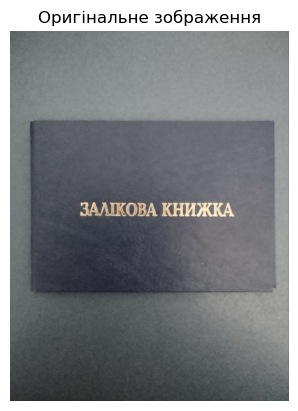

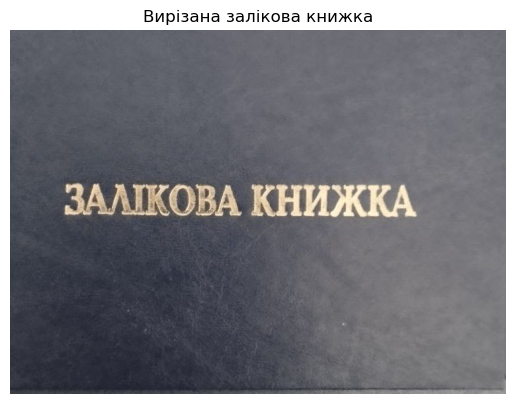

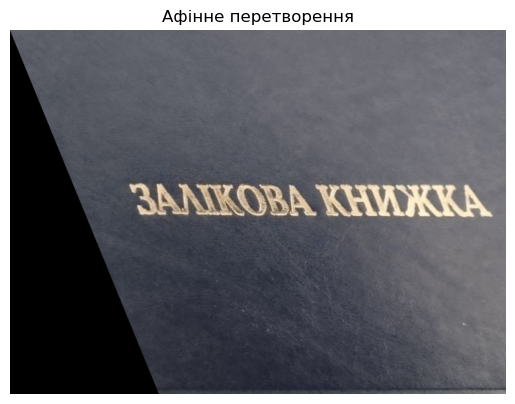

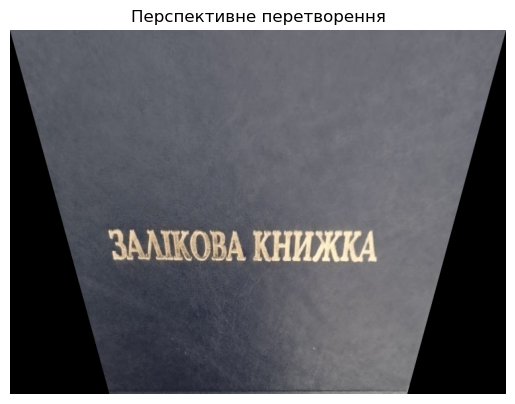

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Завантаження зображення
image_path = 'Treatment.jpg'  # Шлях до завантаженого зображення
image = cv2.imread(image_path)

# Відображення оригінального зображення
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Оригінальне зображення')
plt.axis('off')
plt.show()

# Вирізання області залікової книжки
# Вкажемо координати прямокутника, що охоплює заліковку вручну або за допомогою візуального інструменту
x, y, w, h = 160, 360, 750, 550  # Замініть ці координати на відповідні для вашого зображення
cropped_image = image[y:y+h, x:x+w]

# Збереження та відображення вирізаної області
cv2.imwrite('/mnt/data/cropped_zalikovka.jpg', cropped_image)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Вирізана залікова книжка')
plt.axis('off')
plt.show()

# 1. Афінне перетворення
# Точки для афінного перетворення (оберіть вручну відповідно до зображення)
pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1]])  # Початкові точки
pts2 = np.float32([[0, 0], [w-1, 0], [int(0.3 * w), h-1]])  # Точки після перетворення

# Обчислення афінної матриці
affine_matrix = cv2.getAffineTransform(pts1, pts2)
affine_transformed = cv2.warpAffine(cropped_image, affine_matrix, (w, h))

# Збереження та відображення афінного перетворення
cv2.imwrite('/mnt/data/affine_transformed.jpg', affine_transformed)
plt.imshow(cv2.cvtColor(affine_transformed, cv2.COLOR_BGR2RGB))
plt.title('Афінне перетворення')
plt.axis('off')
plt.show()

# 2. Перспективне перетворення
# Точки для перспективного перетворення
pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])  # Початкові точки
pts2 = np.float32([[0, 0], [w-1, 0], [int(0.2 * w), h-1], [int(0.8 * w), h-1]])  # Точки після перетворення

# Обчислення матриці перспективного перетворення
perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
perspective_transformed = cv2.warpPerspective(cropped_image, perspective_matrix, (w, h))

# Збереження та відображення перспективного перетворення
cv2.imwrite('/mnt/data/perspective_transformed.jpg', perspective_transformed)
plt.imshow(cv2.cvtColor(perspective_transformed, cv2.COLOR_BGR2RGB))
plt.title('Перспективне перетворення')
plt.axis('off')
plt.show()

### 8. Робочий документ оформити у вигляді Notebook-документу (файл .ipynb).

### 9. Дати відповіді на контрольні запитання.

### 10. Скомпілювати звіт у форматі .html. Для цього необхідно завантажити термінал і у командному рядку запустити наступну команду:

jupyter nbconvert lab_2_StudentLastName.ipynb --to html

### 11. Представити звіт у вигляді архіву. Проект має складатися мінімум з двох файлів: 
lab_2_StudentLastName.ipynb та lab_2_StudentLastName.html

## Контрольні запитання

### 1. У чому полягає сенс афінних перетворень?

Афінні перетворення — це лінійні перетворення простору, які зберігають прямі лінії та співвідношення між точками. Іншими словами, під час афінного перетворення прямі лінії залишаються прямими, паралельні лінії залишаються паралельними, а пропорції між відстанями та кутами можуть змінюватися, але зв'язки між точками зберігаються.
	
Афінні перетворення включають такі операції:

-Трансляція (зміщення).

-Масштабування (зміна розміру).

-Поворот.

-Зсув (деформація).

Суть афінних перетворень — це можливість зберігати ключові геометричні властивості об'єктів (лінійність, паралельність) і водночас маніпулювати їх розміром, положенням та орієнтацією в просторі.

### 2. Чи є оперції трансляції, масштабування і повороту афінними? Відповідь обгрунтувати.

Трансляція (переміщення) — це зміщення кожної точки на однакову величину в одному або кількох напрямках. Це афінне перетворення, оскільки воно зберігає прямі лінії та пропорції, але змінює абсолютне положення об'єкта.

Масштабування — це зміна розміру об'єкта (збільшення або зменшення) відносно певної точки. Це також афінне перетворення, оскільки після масштабування прямі лінії та паралельність зберігаються, але змінюється відстань між точками.

Поворот — це обертання об'єкта навколо заданої точки. Після повороту паралельні лінії залишаються паралельними, а прямі лінії залишаються прямими, тому це теж афінне перетворення.

Таким чином, усі ці операції є афінними, оскільки вони зберігають основні геометричні властивості об'єктів, такі як прямі лінії та співвідношення між точками.

### 3. Чи є перспективні перетворення частинним випадком афінних перетворень? Відповідь обгрунтувати.

У перспективних перетвореннях паралельні лінії можуть сходитися в одну точку, що є характерним для ефекту перспективи. Вони змінюють пропорції між об'єктами в залежності від їх відстані від точки спостереження. Перспективні перетворення моделюють проєкцію тривимірного простору на двовимірну площину, що призводить до зміни форми об'єктів і їх розміру залежно від їх віддаленості від камери або спостерігача.

Афінні перетворення зберігають паралельність ліній і не змінюють співвідношення відстаней так, як це робить перспектива. Вони не враховують ефект глибини або тривимірного простору.

Таким чином, перспективні перетворення є більш загальними, ніж афінні, і не можуть бути зведені до них, оскільки вони порушують паралельність ліній і вводять ефект перспект